#**Proje Bilgilendirme**
Bu proje, kalp hastalığı tahmini üzerine odaklanmaktadır ve çeşitli makine öğrenme teknikleri kullanarak hastalık riskini öngörmeye çalışmaktadır. Proje kapsamında, Kaggle'dan alınan ["Indicators of Heart Disease"](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) veri seti kullanılmaktadır. Bu veri seti, hastaların sağlık bilgilerini içeren özellikler sunarak, kalp hastalığına dair önemli bilgiler sağlamaktadır.

Bu projede, makine öğrenme algoritmalarını kullanarak kalp hastalığı riskini tahmin eden bir model geliştirilmiştir ve çeşitli analizlerle sonuçlar değerlendirilmiştir.


---



#Gerekli kütüphanelerin yüklenmesi
Bu kod hücresinde, veri işleme ve görselleştirme için gerekli kütüphaneler yüklenir ve uyarılar gizlenir.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

#Veriyi yükleme ve ilk inceleme
Bu kod hücresinde, bir CSV dosyasından veri okunur ve ilk 5 satır df DataFrame'inde görüntülenir.

In [21]:
df = pd.read_csv("/content/drive/MyDrive/aygazMakineOgrenmesi/indicatorsOfHeartDisease.csv")  # veriyi df DataFrame'ine kaydeder
df.head() # ilk 5 veriyi gösterir


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#Veri Tipi ve Eksik Veri Kontrolü
Bu kod hücresinde, veri çerçevesinin genel bilgileri (df.info()) ve istatistiksel özeti (df.describe()) görüntülenir.

In [22]:
df.info()  # Verinin genel bilgileri
df.describe()  # İstatistiksel özet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000



#Sütun İsimlerini Yeniden Adlandırma
Bu kod hücresinde, veri çerçevesindeki sütun isimleri daha anlamlı ve Python kodu için uygun hale getirilir.

In [23]:
df = df.rename(columns={
    'HeartDisease': 'heart_disease',
    'BMI': 'bmi',
    'Smoking': 'smoking',
    'AlcoholDrinking': 'alcohol_drinking',
    'Stroke': 'stroke',
    'PhysicalHealth': 'physical_health',
    'MentalHealth': 'mental_health',
    'DiffWalking': 'diff_walking',
    'Sex': 'sex',
    'AgeCategory': 'age_category',
    'Race': 'race',
    'Diabetic': 'diabetic',
    'PhysicalActivity': 'physical_activity',
    'GenHealth': 'general_health',
    'SleepTime': 'sleep_time',
    'Asthma': 'asthma',
    'KidneyDisease': 'kidney_disease',
    'SkinCancer': 'skin_cancer'
})

#Kategorik Verileri Sayısal Verilere Dönüştürme
Bu kod hücresinde, Evet/Hayır olarak verilen veriler 1 ve 0 değerlerine dönüştürülür. Ayrıca, cinsiyet ve ırk gibi kategorik değerler de 1 ve 0 şeklinde kodlanır.

In [24]:
# Evet/Hayır olarak verilen veriler 1 ve 0'a dönüştürülüyor
df['heart_disease'] = df['heart_disease'].apply(lambda x: 1 if x == 'Yes' else 0)
df['smoking'] = df['smoking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['alcohol_drinking'] = df['alcohol_drinking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['stroke'] = df['stroke'].apply(lambda x: 1 if x == 'Yes' else 0)
df['diff_walking'] = df['diff_walking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['diabetic'] = df['diabetic'].apply(lambda x: 1 if x == 'Yes' else 0)
df['physical_activity'] = df['physical_activity'].apply(lambda x: 1 if x == 'Yes' else 0)
df['asthma'] = df['asthma'].apply(lambda x: 1 if x == 'Yes' else 0)
df['kidney_disease'] = df['kidney_disease'].apply(lambda x: 1 if x == 'Yes' else 0)
df['skin_cancer'] = df['skin_cancer'].apply(lambda x: 1 if x == 'Yes' else 0)

# Cinsiyet ve ırk da 1 ve 0'a dönüştürülüyor
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Female' else 0)
df['race'] = df['race'].apply(lambda x: 1 if x == 'White' else 0)

Bu kod hücresinde, genel sağlık ve yaş kategorilerindeki metin değerleri sayısal değerlere dönüştürülür. general_health ve age_category sütunları, belirli bir sayısal aralıkla temsil edilen değerlere dönüştürülür ve dönüştürülmüş ilk 5 satır tekrar incelenir.

In [26]:
# Genel sağlık verisi kategorilere ayrılıyor
def general_health_to_numeric(general_health):
    if general_health == 'Excellent':
        return 4
    elif general_health == 'Very good':
        return 3
    elif general_health == 'Good':
        return 2
    elif general_health == 'Fair':
        return 1
    elif general_health == 'Poor':
        return 0
    else:
        return -1  # Hatalı veri durumunda

# Yaş kategorilerini de sayısal değerlere dönüştürme
def age_category_to_numeric(age_category):
    if age_category == '80 or older':
        return 12
    elif age_category == '75-79':
        return 11
    elif age_category == '70-74':
        return 10
    elif age_category == '65-69':
        return 9
    elif age_category == '60-64':
        return 8
    elif age_category == '55-59':
        return 7
    elif age_category == '50-54':
        return 6
    elif age_category == '45-49':
        return 5
    elif age_category == '40-44':
        return 4
    elif age_category == '35-39':
        return 3
    elif age_category == '30-34':
        return 2
    elif age_category == '25-29':
        return 1
    elif age_category == '20-24':
        return 0
    else:
        return -1  # Hatalı veri durumunda

df['general_health'] = df['general_health'].apply(general_health_to_numeric)
df['age_category'] = df['age_category'].apply(age_category_to_numeric)

df.head()  # İlk 5 veriyi tekrar inceleme

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,general_health,sleep_time,asthma,kidney_disease,skin_cancer
0,0,16.60,1,0,0,3.0,30.0,0,1,-1,1,1,1,-1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,-1,1,0,1,-1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,-1,1,1,1,-1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,-1,1,0,0,-1,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,-1,1,0,1,-1,8.0,0,0,0



#Eğitim ve Test Kümelerine Ayırma
Bu kod hücresinde, özellikler (X) ve hedef değişken (y) oluşturulur ve veri seti eğitim (%75) ve test (%25) kümelerine ayrılır. Verinin karıştırılması (shuffle=True) ve rastgelelik (random_state=104) ayarlanır.

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=104, shuffle=True)

#Linear Regression Modeli ve Çapraz Doğrulama
Bu kod hücresinde, Linear Regression modeli oluşturulur ve 5-katlı çapraz doğrulama ile değerlendirilir. Çapraz doğrulama skorları, ortalama ve standart sapma hesaplanır. Ayrıca, model test seti üzerinde fit edilir ve test skoru hesaplanır.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Modeli oluştur
lm = LinearRegression()

# Çapraz doğrulama ile modeli değerlendirilir
cv_scores = cross_val_score(lm, X_train, y_train, cv=5, scoring='r2')  # 5-katlı çapraz doğrulama

# Sonuçları yazdırma
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Çapraz Doğrulama Skoru:", np.mean(cv_scores))
print("Standart Sapma:", np.std(cv_scores))

# Modeli fit et ve test seti üzerinde skoru hesaplama
lm.fit(X_train, y_train)
lmScore = lm.score(X_test, y_test)
print(f"Linear Regression Test Skoru: {lmScore:.2f}")

Çapraz Doğrulama Skorları: [0.10883531 0.11416654 0.11278727 0.11380908 0.11484708]
Ortalama Çapraz Doğrulama Skoru: 0.11288905524925467
Standart Sapma: 0.0021333306722028907
Linear Regression Test Skoru: 0.12


#Logistic Regression Modeli ve Çapraz Doğrulama
Bu kod hücresinde, Logistic Regression modeli oluşturulur ve 5-katlı çapraz doğrulama ile değerlendirilir. Çapraz doğrulama skorları, ortalama ve standart sapma hesaplanır. Ayrıca, model test seti üzerinde fit edilir ve test doğruluğu hesaplanır.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Modeli oluşturma
log_model = LogisticRegression(max_iter=1000)

# Çapraz doğrulama ile modeli değerlendirme
cv_scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-katlı çapraz doğrulama

# Sonuçları yazdırma
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Çapraz Doğrulama Skoru:", np.mean(cv_scores))
print("Standart Sapma:", np.std(cv_scores))

# Modeli fit et ve test seti üzerinde skoru hesaplama
log_model.fit(X_train, y_train)
logScore = log_model.score(X_test, y_test)
print(f"Logistic Regression Test Doğruluğu: {logScore:.2f}")


Çapraz Doğrulama Skorları: [0.91417553 0.91548709 0.91502846 0.91404866 0.91582063]
Ortalama Çapraz Doğrulama Skoru: 0.9149120716482463
Standart Sapma: 0.0007010929677000406
Logistic Regression Test Doğruluğu: 0.92


#Decision Tree Modeli ve Çapraz Doğrulama
Bu kod hücresinde, Decision Tree Classifier modeli oluşturulur ve 5-katlı çapraz doğrulama ile değerlendirilir. Çapraz doğrulama skorları, ortalama ve standart sapma hesaplanır. Ayrıca, model test seti üzerinde fit edilir ve test doğruluğu hesaplanır.

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Modeli oluşturma
dt_model = DecisionTreeClassifier()

# Çapraz doğrulama ile modeli değerlendirme
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-katlı çapraz doğrulama

# Sonuçları yazdırma
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Çapraz Doğrulama Skoru:", np.mean(cv_scores))
print("Standart Sapma:", np.std(cv_scores))

# Modeli fit et ve test seti üzerinde skoru hesaplama
dt_model.fit(X_train, y_train)
dtScore = dt_model.score(X_test, y_test)
print(f"Decision Tree Test Doğruluğu: {dtScore:.2f}")


Çapraz Doğrulama Skorları: [0.86785491 0.86781046 0.86628864 0.86708082 0.86783131]
Ortalama Çapraz Doğrulama Skoru: 0.8673732291483696
Standart Sapma: 0.0006156050751751641
Decision Tree Test Doğruluğu: 0.87


#Modellerin Test Doğruluklarını Bar Grafiği ile Görselleştirme
Bu kod hücresinde, farklı modellerin test doğrulukları bir bar grafiği ile görselleştirilir. Grafikte, model isimleri ve doğruluk skorları karşılaştırılır.

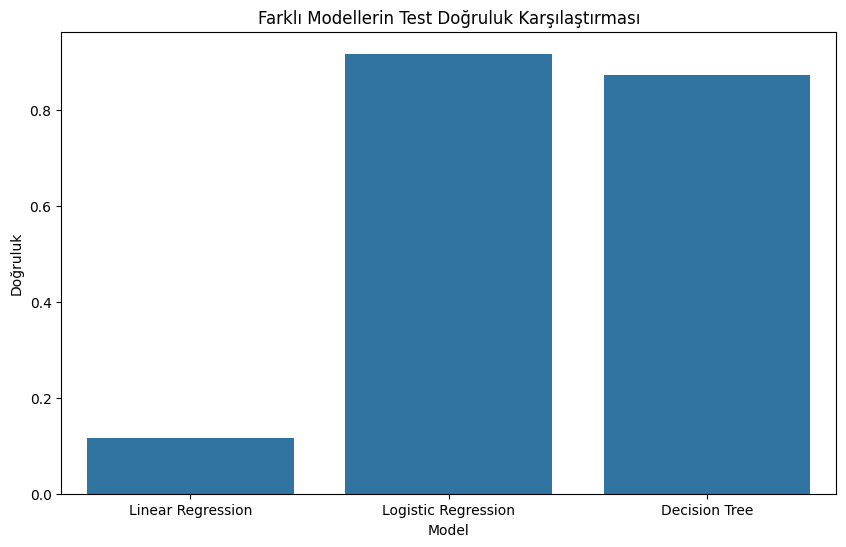

In [31]:
model_scores = {
    'Model': ['Linear Regression', 'Logistic Regression', 'Decision Tree'],
    'Accuracy': [lmScore, logScore, dtScore]
}

# DataFrame oluşturma
model_scores_df = pd.DataFrame(model_scores)

# Farklı modellerin test doğruluklarını bar grafiği ile görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_scores_df)
plt.title('Farklı Modellerin Test Doğruluk Karşılaştırması')
plt.xlabel('Model')
plt.ylabel('Doğruluk')
plt.show()

#K-Means Kümeleme Analizi
Bu kod hücresinde, sigara içme ve alkol tüketimi verileri kullanılarak K-Means kümeleme yapılır. Küme etiketleri ile veriler görselleştirilir ve küme merkezleri kırmızı noktalarla gösterilir.

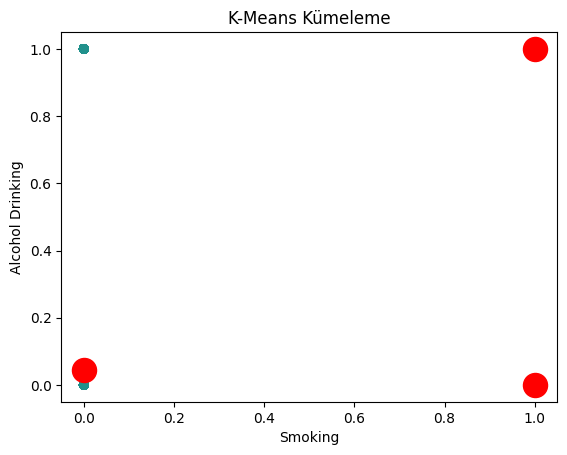

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sigara içme ve alkol tüketimi verileri ile K-means kümeleme
X = df[['smoking', 'alcohol_drinking']]

# Model oluşturma
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Küme etiketlerini alma
clusters = kmeans.labels_

# Küme merkezlerini görselleştirme
plt.scatter(X['smoking'], X['alcohol_drinking'], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Smoking')
plt.ylabel('Alcohol Drinking')
plt.title('K-Means Kümeleme')
plt.show()


#Veriyi Apriori Algoritması İçin Uygun Hale Getirme
AprioriData veri çerçevesi oluşturulur ve gereksiz sütunlar (bmi, physical_health, mental_health, age_category, general_health, sleep_time) çıkarılır. Sonuç olarak, verinin Apriori algoritması için uygun hale getirilmiş hali görüntülenir.

In [13]:
# Veriyi uygun hale getirme
aprioriData = df.copy()
aprioriData.head()
aprioriData.drop('bmi', axis=1, inplace=True)
aprioriData.drop('physical_health', axis=1, inplace=True)
aprioriData.drop('mental_health', axis=1, inplace=True)
aprioriData.drop('age_category', axis=1, inplace=True)
aprioriData.drop('general_health', axis=1, inplace=True)
aprioriData.drop('sleep_time', axis=1, inplace=True)

aprioriData.head()

,heart_disease,smoking,alcohol_drinking,stroke,diff_walking,sex,race,diabetic,physical_activity,asthma,kidney_disease,skin_cancer
0,0,1,0,0,0,1,1,1,1,1,0,1
1,0,0,0,1,0,1,1,0,1,0,0,0
2,0,1,0,0,0,0,1,1,1,1,0,0
3,0,0,0,0,0,1,1,0,0,0,0,1
4,0,0,0,0,1,1,1,0,1,0,0,0


Bu kod hücresinde, Apriori algoritması kullanılarak sık geçen öğeler (min_support=0.6) belirlenir ve görüntülenir. Ardından, birliktelik kuralları (metric="confidence", min_threshold=0.7) oluşturulur ve kuralların detayları yazdırılır.

In [33]:
from mlxtend.frequent_patterns import apriori, association_rules

# Sık geçen öğeleri bulma (min_support = 0.6, yani %60)
frequent_itemsets = apriori(aprioriData, min_support=0.6, use_colnames=True)

# Sık geçen öğeleri görüntüleme
print(frequent_itemsets)

print("-------------------------------------------------------------------------")

# Birliktelik kurallarını oluşturma
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Kuralları görüntüleme
print(rules)

    support                   itemsets
0  0.766779                     (race)
1  0.775362        (physical_activity)
2  0.605857  (physical_activity, race)
-------------------------------------------------------------------------
           antecedents          consequents  antecedent support  \
0  (physical_activity)               (race)            0.775362   
1               (race)  (physical_activity)            0.766779   

   consequent support   support  confidence     lift  leverage  conviction  \
0            0.766779  0.605857    0.781385  1.01905  0.011326    1.066815   
1            0.775362  0.605857    0.790133  1.01905  0.011326    1.070379   

   zhangs_metric  
0       0.083216  
1       0.080153  


#Kümeleme ve Sonuçları İnceleme
Bu kod hücresinde, örnek veri seti kullanılarak Agglomerative Clustering modeli oluşturulur ve eğitim verileri üzerinde kümeleme yapılır. İlk 10 örneğin küme etiketleri görüntülenir.

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import shuffle

# Örnek veri seti (X_train'in bir kısmını al)
X_train_sample = shuffle(X_train, random_state=42)[:1000]

# Kümeleme modeli oluşturma
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Eğitim verileri üzerinde kümeleme yapma
clusters_train_sample = model.fit_predict(X_train_sample)

# Sonuçları kontrol etme
print("Eğitim verilerindeki kümeler (örnek):")
print(clusters_train_sample[:10])  # İlk 10 örneğin küme etiketleri


Eğitim verilerindeki kümeler (örnek):
[0 1 0 0 0 0 0 0 0 2]


#Logistic Regression Modeli için Hiperparametre Optimizasyonu
Bu kod hücresinde, Logistic Regression modeli için hiperparametre optimizasyonu gerçekleştirilir. RandomizedSearchCV kullanılarak çeşitli hiperparametre kombinasyonları (penalty, C, solver, max_iter) denenir ve en iyi performansı gösteren model seçilir. Model, eğitim verileri (X_train, y_train) üzerinde fit edilir.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Eksik importlar
import numpy as np

# Hiperparametre aralığı
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-2, 2, 10),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Logistic Regression modelini oluşturma
log_model = LogisticRegression()

# RandomizedSearchCV ile hiperparametre optimizasyonu
random_search = RandomizedSearchCV(estimator=log_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)

# Modeli eğit
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

#En İyi Parametreler ve Performans Metrikleri
Bu kod hücresinde, RandomizedSearchCV kullanılarak elde edilen en iyi hiperparametreler ve çapraz doğrulama skoru yazdırılır. Ayrıca, test seti üzerinde modelin doğruluğu, kesinlik, duyarlılık ve F1 puanı hesaplanır ve sonuçlar görüntülenir.

In [36]:
# En iyi parametreleri ve doğrulama skorunu yazdırma
print("En iyi parametreler:", random_search.best_params_)
print("En iyi çapraz doğrulama skoru:", random_search.best_score_)

# Test seti üzerinde modelin doğruluğunu hesaplama
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performans metriklerini hesaplama
log_accuracy = accuracy_score(y_test, y_pred)
log_precision = precision_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred)

# Sonuçları yazdırma
print(f"Logistic Regression Test Doğruluğu (Accuracy): {log_accuracy:.2f}")
print(f"Logistic Regression Kesinlik (Precision): {log_precision:.2f}")
print(f"Logistic Regression Duyarlılık (Recall): {log_recall:.2f}")
print(f"Logistic Regression F1 Puanı (F1 Score): {log_f1:.2f}")


En iyi parametreler: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 500, 'C': 0.01}
En iyi çapraz doğrulama skoru: 0.9151330451747134
Logistic Regression Test Doğruluğu (Accuracy): 0.92
Logistic Regression Kesinlik (Precision): 0.55
Logistic Regression Duyarlılık (Recall): 0.08
Logistic Regression F1 Puanı (F1 Score): 0.14


#Confusion Matrix Görselleştirme
Bu kod hücresinde, test seti üzerindeki modelin tahminleri kullanılarak bir confusion matrix görselleştirilir. Confusion matrix, modelin gerçek ve tahmin edilen sınıflar arasındaki dağılımı gösterir, bu da modelin performansını değerlendirmeye yardımcı olur.

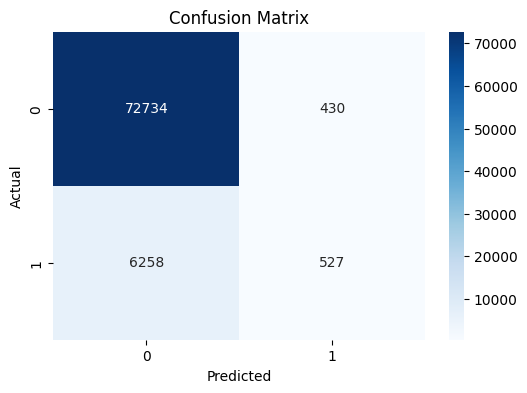

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix hesaplama
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Grafik başlığı ve etiketler
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Grafiği göster
plt.show()
